In [1]:
import ImageD11.transformer
import pylab as pl, numpy as np

In [2]:
def plotfit(t):
    f, ax = pl.subplots( 2,len(t.theorytth), figsize=(15,6))
    tth, eta = t.compute_tth_eta()
    keep = np.zeros( tth.shape, bool )
    for i, ringtth in enumerate(t.theorytth):
        m = abs(tth - ringtth) < 0.1
        sig = t.colfile.sum_intensity[m]
        keep |= ((t.colfile.sum_intensity > sig.max() / 10) & m)
        k = sig > sig.max()/10
        ax[0][i].plot( tth[m][k], sig[k],'.' )
        ax[0][i].plot( tth[m][~k], sig[~k],'.' )
        ax[0][i].plot( [ringtth, ringtth], [sig.min(), sig.max()] ,'k-', lw=0.5)
        ax[0][i].set(yscale='log')
        ax[1][i].plot( tth[m][k], eta[m][k],'.' )
        ax[1][i].plot( tth[m][~k], eta[m][~k],'.' )
        ax[1][i].plot( [ringtth, ringtth], [-180,180] ,'k-', lw=0.5)
    pl.show()
    return keep

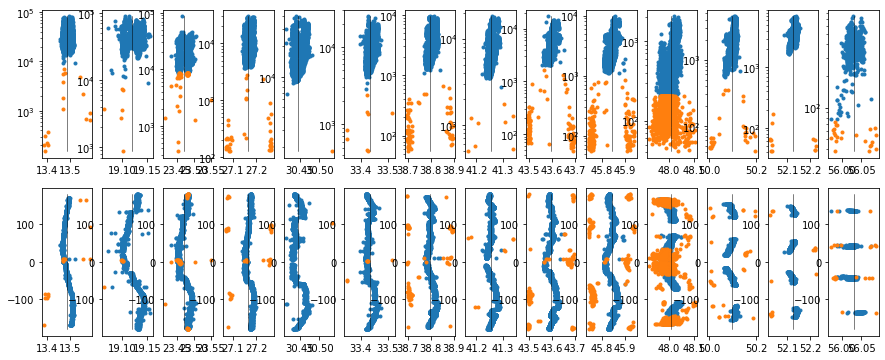

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 60   Best = 27.394984   Worst = 27.395207                            [2119.8048975843026, 2093.9167174949507, 146.9673719953503, -0.001573846768480525, 0.0008250432642969382]


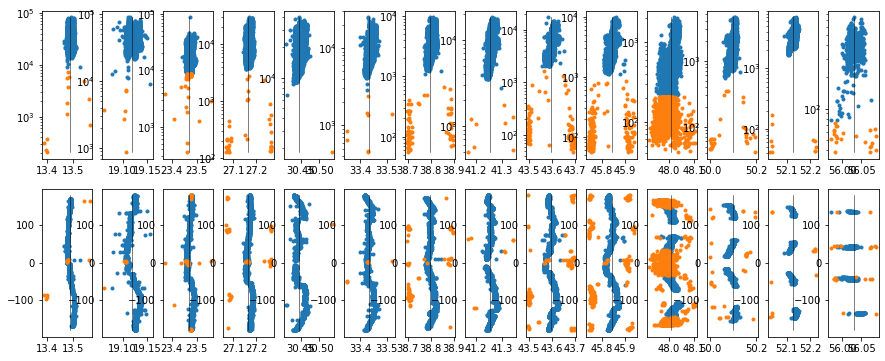

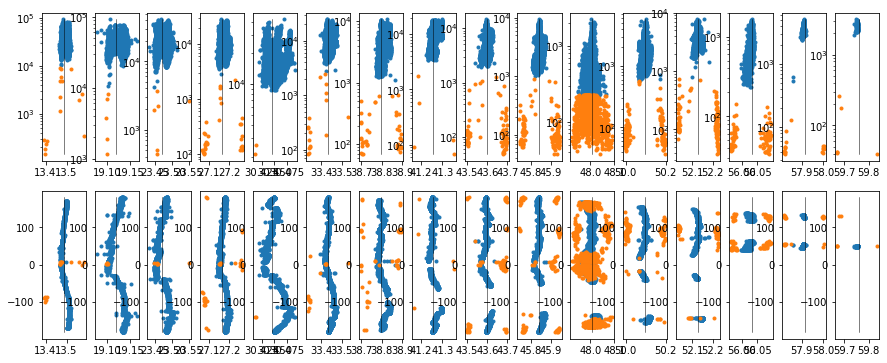

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 63   Best = 26.039325   Worst = 26.039537                    [2119.676633223843, 1560.3491893676737, 146.98326990464196, -0.0011815840302926027, 0.0008407254190670882]


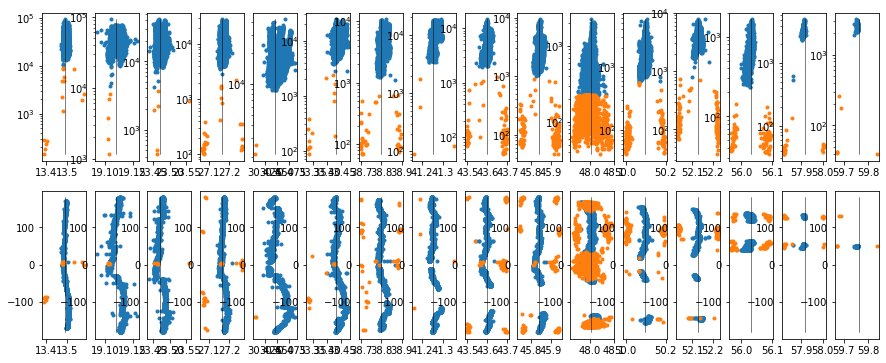

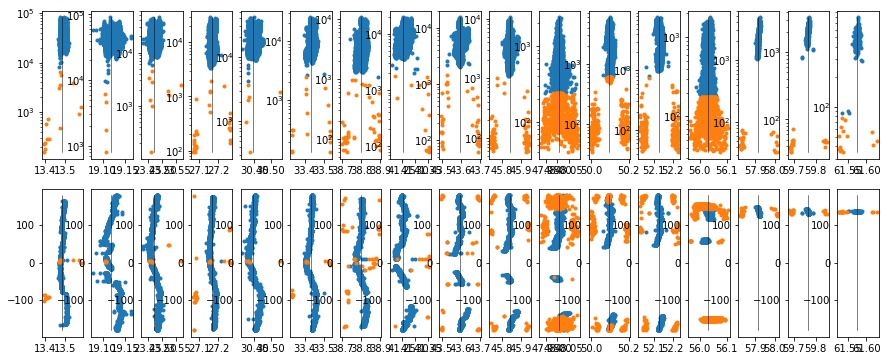

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 63   Best = 23.725289   Worst = 23.725531                    [2659.9918449865845, 1560.4255179876511, 147.00775366712426, -0.0011674715446387085, 0.0011286196742781736]


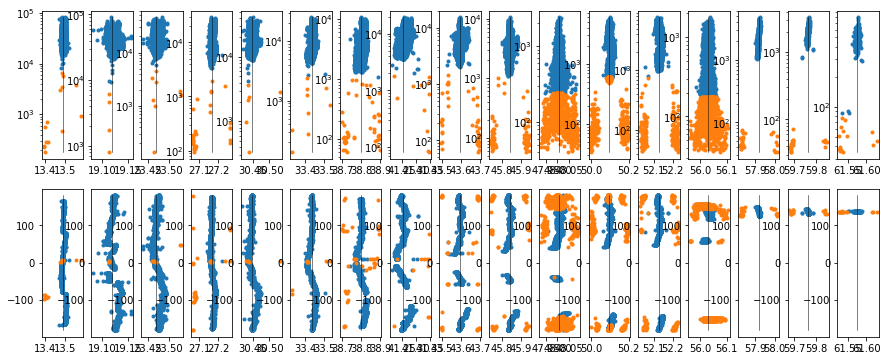

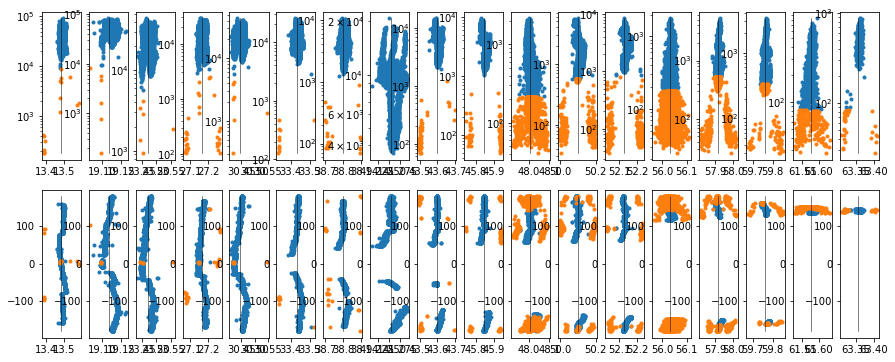

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 67   Best = 21.107481   Worst = 21.107738                    [3192.9279145720966, 1560.3738385564748, 147.05176589138807, -0.001037154560259057, 0.0013298641253150338]


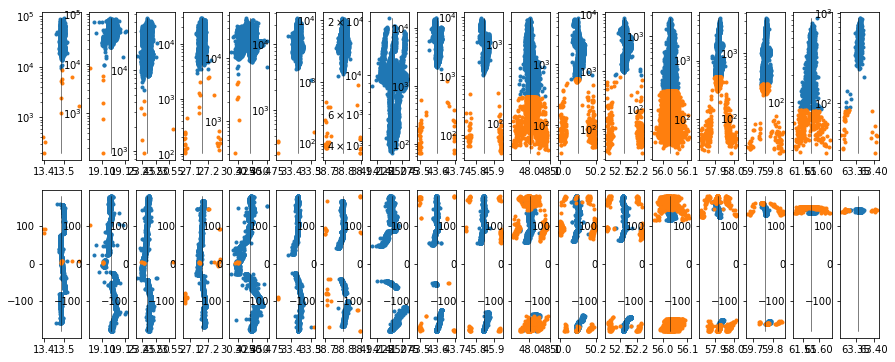

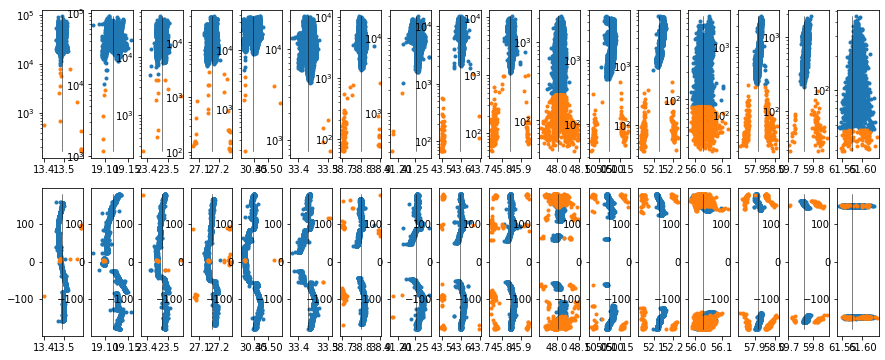

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 66   Best = 23.919795   Worst = 23.920009                    [3193.195893954986, 2094.1614507568133, 147.027433850835, -0.0016222637709040894, 0.0013054876774430083]


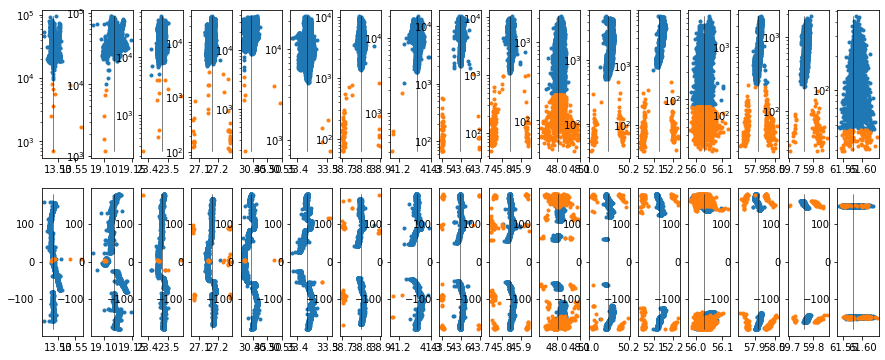

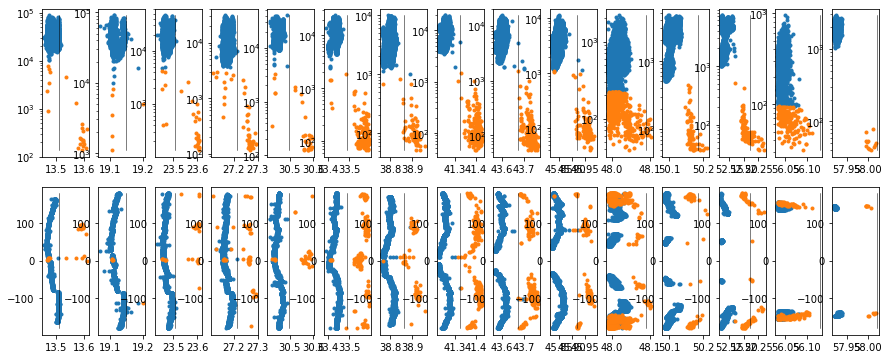

Tolerance for assigning peaks to rings 0.01 , min tth 0.0 , max tth 180.0
Iteration = 59   Best = 13.686186   Worst = 13.686360                                            [2660.4895303601743, 2094.361274206077, 146.95301099130046, -0.0016313340770935762, 0.0009731415509985028]


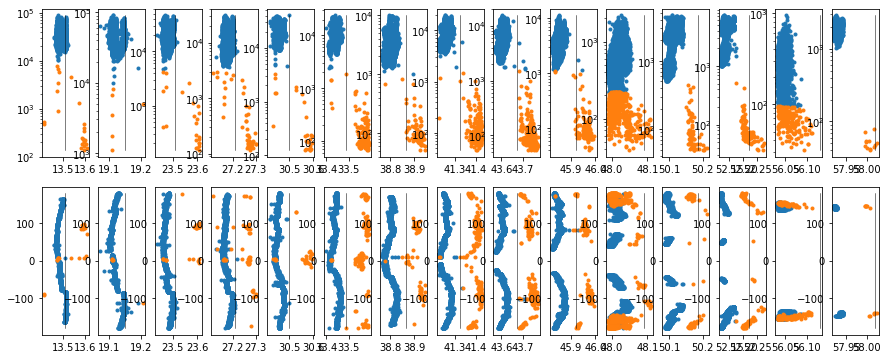

In [3]:
for i in range(1,7):
    t = ImageD11.transformer.transformer()
    t.loadfiltered(f'eigerSpatial/flt/{i}.flt')
    t.loadfileparameters(f'eigerSpatial/par/{i}.par')
    t.parameterobj.set('fit_tolerance',0.01)
    tth, eta = t.compute_tth_eta()
    t.addcellpeaks()
    plotfit(t)
    t.fit()
    m = plotfit(t)
    t.saveparameters(f'eigerSpatial/par/{i}_fit.par')
    t.colfile.filter(m)
    t.colfile.writefile(f'eigerSpatial/flt/{i}_clean.flt')